# Parameter variation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sphere_aerodynamics import *
plt.style.use("seaborn-white")

In [10]:
# Setting simulation parameters

v0 = 29.1       # m/s
theta_d = 17.7  # degrees
g = -9.81       # m/s^2

#  Projectile parameters
M = 0.454    # kg
D = 0.222    # m
omega = 6.8  # rad/s

#  Air parameters
eta = 1.83e-5  # kg/(m s)
rho = 1.05     # kg/m^3

#  Time interval

t0 = 0     # s
tf = 5     # s
dt = 1e-4  # s

#  Encapsulating parameters in a dict so i can save them easily later
simulation_parameters = {
        "g": g, "M": M, "D": D, "omega": omega, "eta": eta, "rho": rho,
        "t0": t0, "tf": tf, "dt": dt
        }

## Results by varying the angle with a fixed velocity

In [3]:
pars_list = []

for angle in np.arange(0, 91, 1):
    pars, res = simu(v0, angle, simulation_parameters)
    pars_list.append(pars)

#  Plotting Results

final = pd.DataFrame(pars_list)

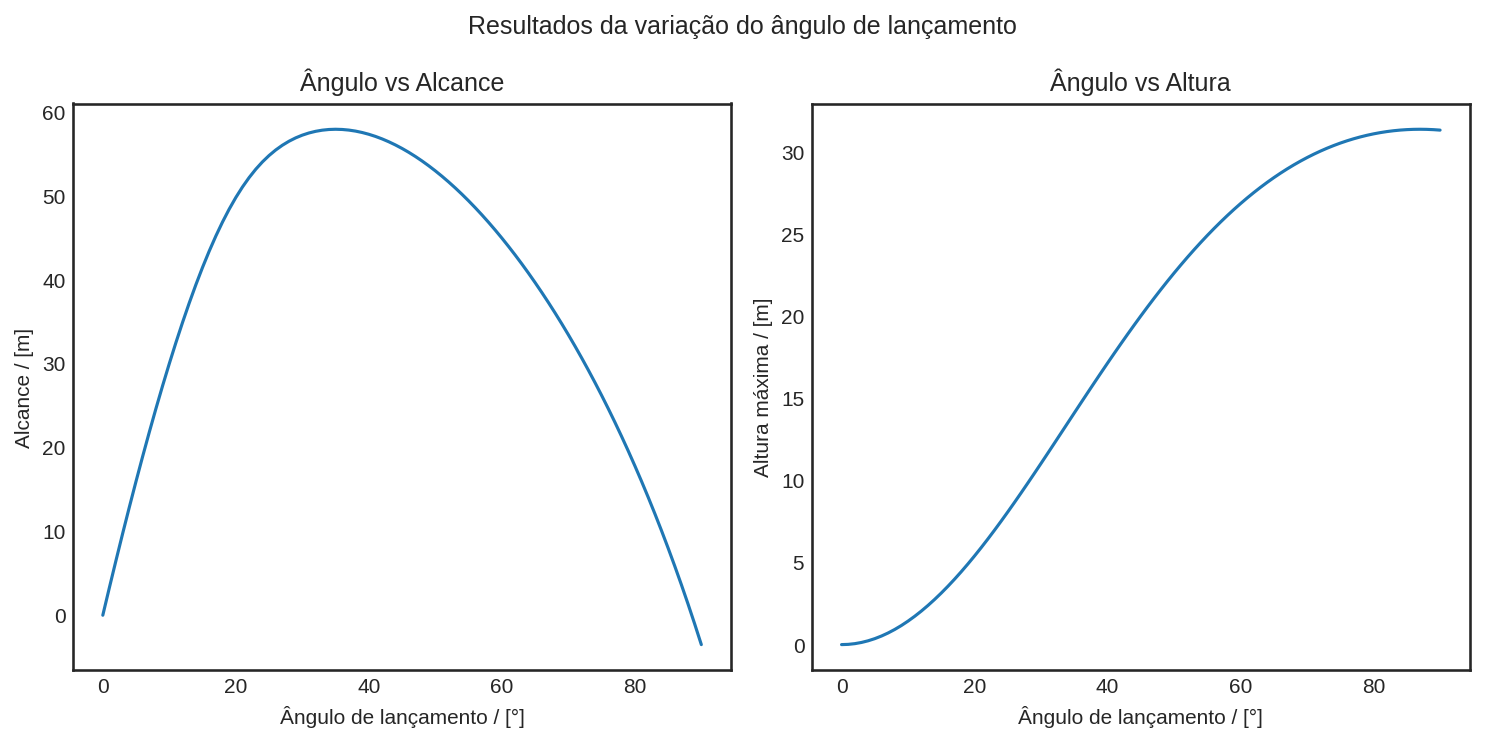

In [4]:
fig, [ax1, ax2] = plt.subplots(ncols=2, dpi=150, figsize=(10, 5))


fig.suptitle("Resultados da variação do ângulo de lançamento")

ax1.plot("Initial angle", "Horizontal reach", data=final)
ax1.set( 
    xlabel="Ângulo de lançamento / [°]",
    ylabel="Alcance / [m]",
    title="Ângulo vs Alcance"
       )

ax2.plot("Initial angle", "Maximum height", data=final)
ax2.set( 
    xlabel="Ângulo de lançamento / [°]",
    ylabel="Altura máxima / [m]",
    title="Ângulo vs Altura"
       )

fig.tight_layout()

In [5]:
theta_reach = final["Initial angle"].iloc[final["Horizontal reach"].argmax()]
theta_height = final["Initial angle"].iloc[final["Maximum height"].argmax()]

print(f"Ângulo que otimiza o alcance: {theta_reach}°")
print(f"Ângulo que otimiza a altura máxima: {theta_height}°")

Ângulo que otimiza o alcance: 35°
Ângulo que otimiza a altura máxima: 87°


## Results by varying the velocity with a fixed angle

In [6]:
pars_list = []

for v0 in np.arange(5, 30, 1):
    pars, res = simu(v0, theta_d, simulation_parameters)
    pars_list.append(pars)

#  Plotting Results

final = pd.DataFrame(pars_list)

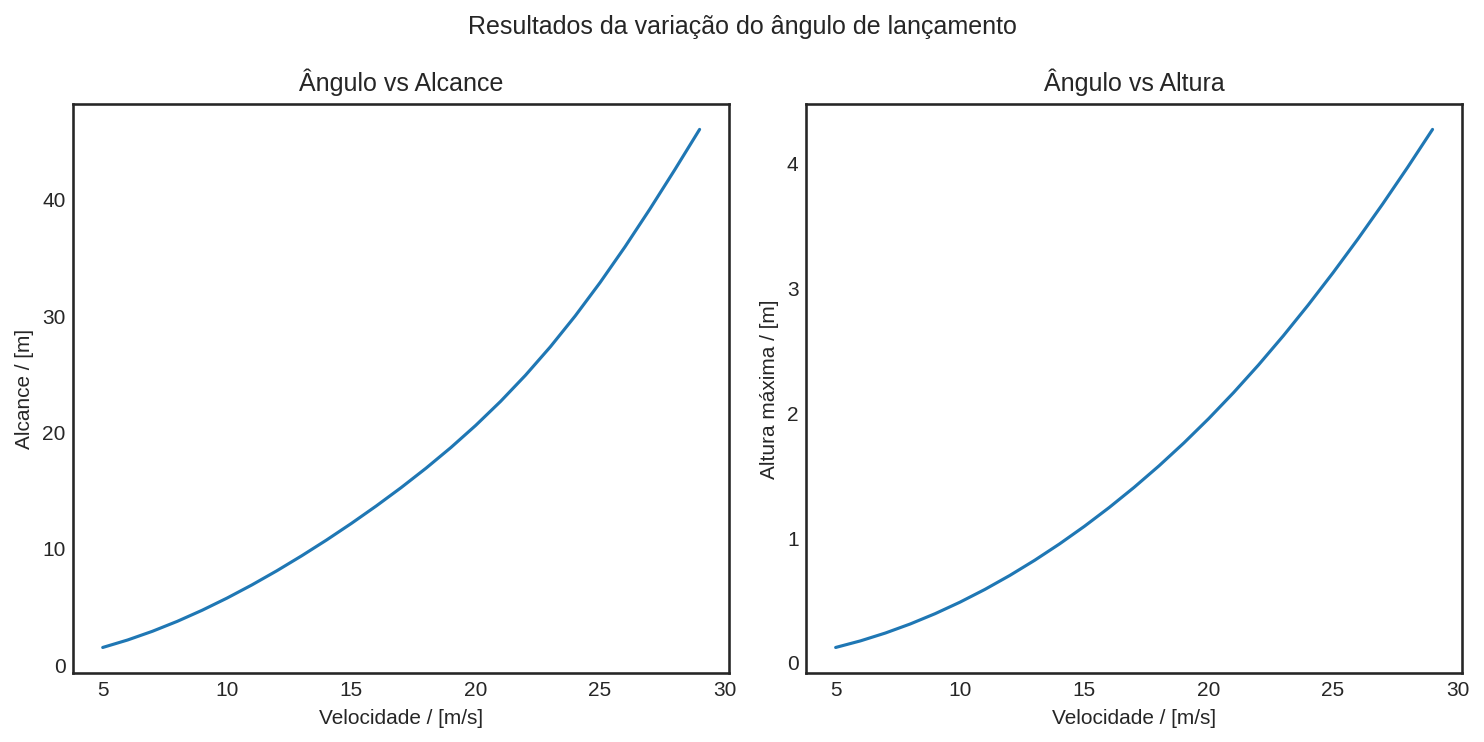

In [7]:
fig, [ax1, ax2] = plt.subplots(ncols=2, dpi=150, figsize=(10, 5))


fig.suptitle("Resultados da variação do ângulo de lançamento")

ax1.plot("Initial speed", "Horizontal reach", data=final)
ax1.set( 
    xlabel="Velocidade / [m/s]",
    ylabel="Alcance / [m]",
    title="Ângulo vs Alcance"
       )

ax2.plot("Initial speed", "Maximum height", data=final)
ax2.set( 
    xlabel="Velocidade / [m/s]",
    ylabel="Altura máxima / [m]",
    title="Ângulo vs Altura"
       )

fig.tight_layout()

# Checking if changing initial speed change optimal angles

Para a velocidade 10 m/s
Ângulo que otimiza o alcance: 45°
Ângulo que otimiza a altura máxima: 90°

Para a velocidade 20 m/s
Ângulo que otimiza o alcance: 42°
Ângulo que otimiza a altura máxima: 87°

Para a velocidade 30 m/s
Ângulo que otimiza o alcance: 33°
Ângulo que otimiza a altura máxima: 87°



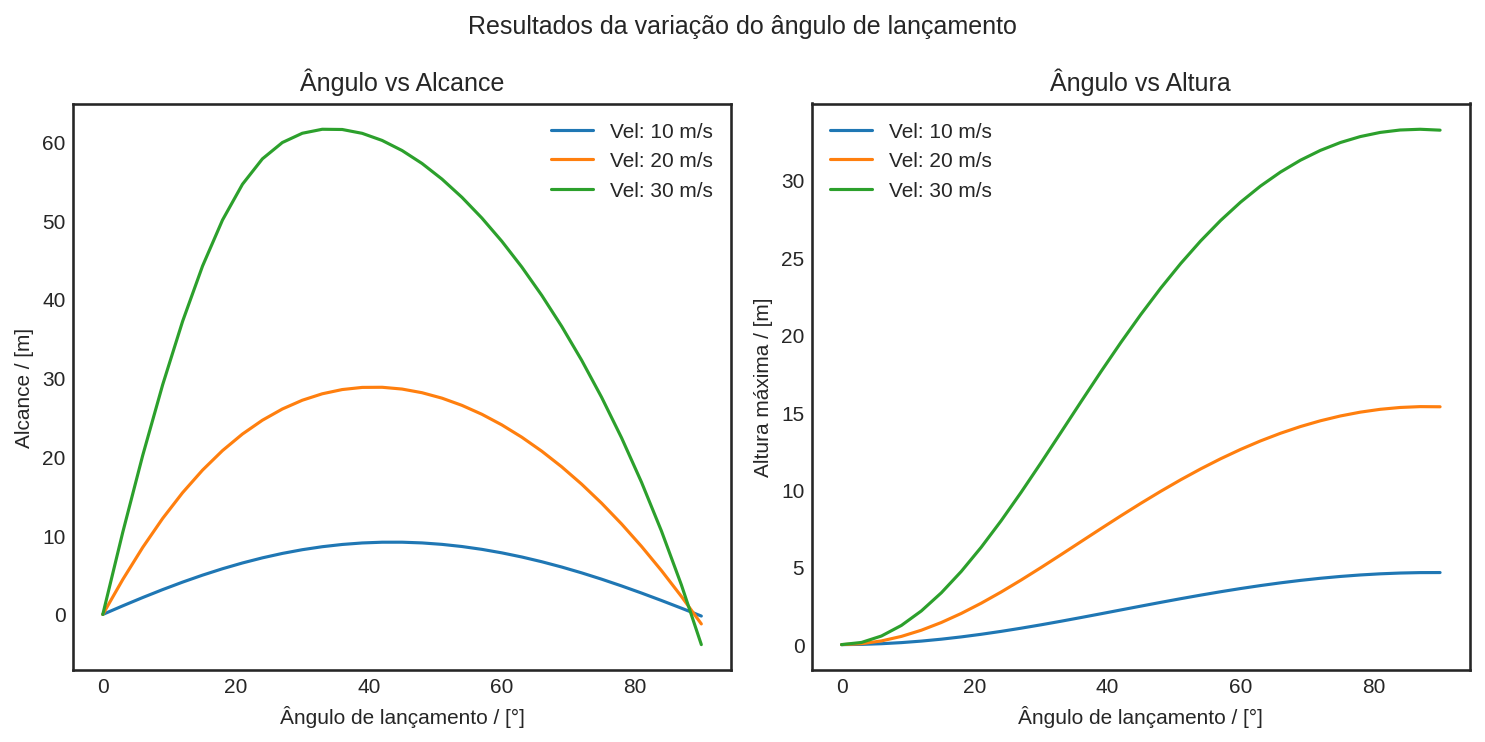

In [20]:
fig, [ax1, ax2] = plt.subplots(ncols=2, dpi=150, figsize=(10, 5))
fig.suptitle("Resultados da variação do ângulo de lançamento")

v = [10, 20, 30]
for vel in v:
    pars_list = []
    for angle in np.arange(0, 91, 3):
        pars, res = simu(vel, angle, simulation_parameters)
        pars_list.append(pars)
    
    final = pd.DataFrame(pars_list)
    
    ax1.plot("Initial angle", "Horizontal reach", data=final, label=f"Vel: {vel} m/s")
    ax2.plot("Initial angle", "Maximum height", data=final, label=f"Vel: {vel} m/s")

    theta_reach = final["Initial angle"].iloc[final["Horizontal reach"].argmax()]
    theta_height = final["Initial angle"].iloc[final["Maximum height"].argmax()]
    print(f"Para a velocidade {vel} m/s")
    print(f"Ângulo que otimiza o alcance: {theta_reach}°")
    print(f"Ângulo que otimiza a altura máxima: {theta_height}°\n")

ax1.set( 
    xlabel="Ângulo de lançamento / [°]",
    ylabel="Alcance / [m]",
    title="Ângulo vs Alcance"
       )
ax2.set( 
    xlabel="Ângulo de lançamento / [°]",
    ylabel="Altura máxima / [m]",
    title="Ângulo vs Altura"
       )

ax1.legend()
ax2.legend()

fig.tight_layout()